In [40]:
import rasterio
from rasterio.windows import Window
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi


from rasterio import Affine
from rasterio import features
from geopandas import GeoDataFrame

In [ ]:
def 

In [41]:
src = rasterio.open("top_potsdam_6_11_RGBIR.tif")

In [42]:
img = src.read([3, 2, 1])

In [43]:
x_corner = 2744
y_corner = 2744
x_inc = 512

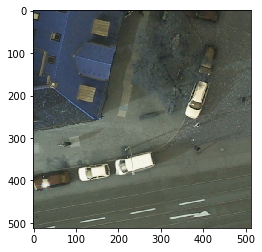

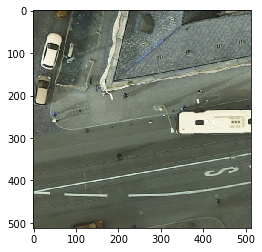

In [44]:
from rasterio.plot import show
for i in range(x_corner, x_corner + x_inc +1, x_inc):
    win = src.read([3,2,1], window = Window(i, y_corner,x_inc, x_inc))
    show(win)

In [46]:
#Watershed segmentation

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

params = {"compactness":1}
for i in [0, 2, 5, 10]:
    params ["compactness"]=i

In [47]:
ws = watershed(win, **params)

In [48]:
from rasterio import Affine
from rasterio import features
shps = features.shapes(win, transform = Affine(0.05, 0.0, 367413.72500000003, 0.0, -0.05, 5807225.374999999))
records = []

In [49]:
from collections import OrderedDict

for id, shp in enumerate(shps):
    item = {'geometry': shp[0], 'id': id+1, 'properties': 
            OrderedDict([('dn', np.int(shp[1]))]),
            'type': 'Feature'}
    records.append(item)

In [50]:
from geopandas import GeoDataFrame

vec = GeoDataFrame.from_features(records)

In [51]:
vec.crs = src.crs

In [52]:
vec.to_file("ws_potsdam.shp")

In [59]:
# SLIC

from skimage.segmentation import slic
from rasterio import features
from geopandas import GeoDataFrame
from collections import OrderedDict

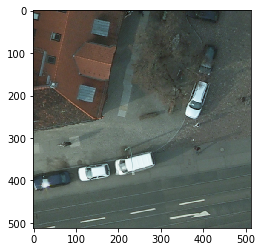

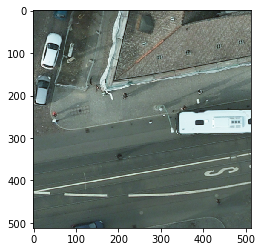

In [62]:
for j in range(x_corner, x_corner + x_inc +1, x_inc):
    win2 = src.read([1,2,3], window = Window(j, y_corner,x_inc, x_inc))
    show(win2)

In [63]:
params={"compactness":20}
for j in [0.01, 0.1, 1, 10, 100]:
    params ["compactness"]=j
    

    slic_potsdam = slic (win2, **params)

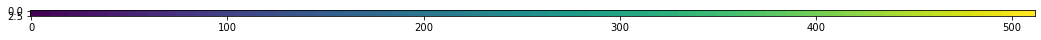

In [64]:
fig = pyplot.subplots(1, 1, figsize=(18,18))
show(slic_potsdam)

In [ ]:
# I don't know why the above figure looks funny...

In [66]:
shps2 = features.shapes(slic_potsdam, transform = Affine(0.05, 0.0, 367413.72500000003, 0.0, -0.05, 5807225.374999999))
records = []

In [68]:
for id, shp in enumerate(shps2):
    item = {'geometry': shp[0], 'id': id+1, 'properties': 
            OrderedDict([('dn', np.int32(shp[1]))]),
            'type': 'Feature'}
    records.append(item)

In [69]:
vec2 = GeoDataFrame.from_features(records)
vec2.crs = src.crs
vec2.to_file("slic_potsdam.shp")

ValueError: Cannot write empty DataFrame to file.

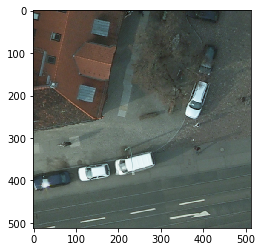

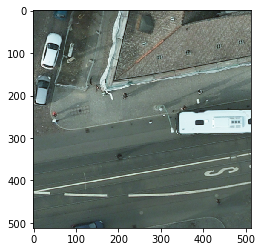

In [92]:
#Felzenschwalb

from skimage.segmentation import felzenszwalb
for k in range(x_corner, x_corner + x_inc +1, x_inc):
    win3 = src.read([1,2,3], window = Window(k, y_corner,x_inc, x_inc))
    show(win3)
 

In [93]:
felzparams={"min_size":20}
for k in [20, 50, 100]:
    felzparams ["min_size"]=k
    

    felz_potsdam = felzenszwalb(win3, **felzparams)

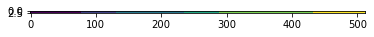

In [94]:
show(felz_potsdam)

In [86]:
#quickshift

for l in range(x_corner, x_corner + x_inc +1, x_inc):
    win4 = src.read([1,2,3], window = Window(l, y_corner,x_inc, x_inc))
wintrans = np.transpose(win4, [2, 1, 0])    

In [87]:
from skimage.segmentation import quickshift

qsparams={"ratio":1.0}
for l in [0.0, 0.25, 0.5, 0.75]:
    qsparams ["ratio"]=l
    

    qs_potsdam = quickshift(wintrans, **qsparams)

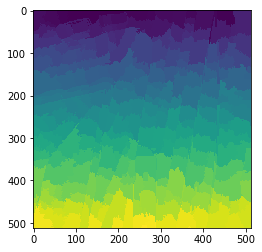

In [88]:
show(qs_potsdam)